(24, 200)


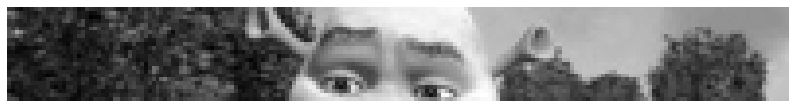

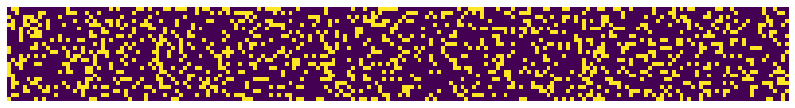

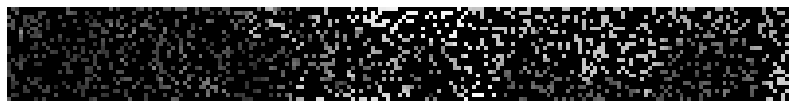

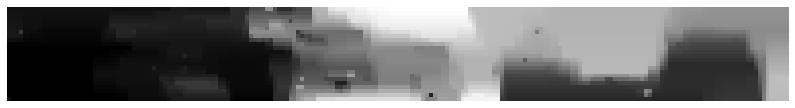

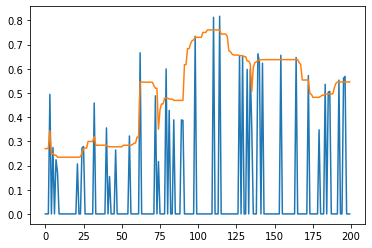

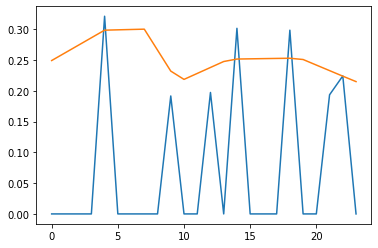

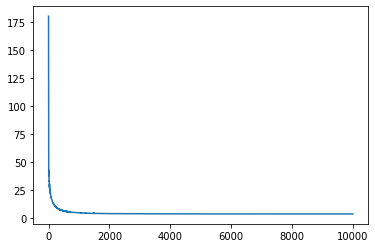

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import ee
import geemap
from functools import partial

from os import chdir
chdir("../Piecewise Constant Denoising/");
%run "../Piecewise Constant Denoising/Khalid_Chambolle_Pock_LinearAndConstant.ipynb"
chdir("../EarthEngine");


#pip install ipympl

In [2]:
df = pd.read_csv("Lhasa/Lhasa_Data-CC-80.csv", index_col=0);
df["SENSING_TIME"] = df["SENSING_TIME"].map(pd.Timestamp);

tiles = df["Tile_ID"].unique();
tiles.sort();
tiles.shape

(1944,)

In [3]:
df_s = pd.read_csv("Lhasa/Lhasa_Sentinel_Data-CC-80.csv", index_col=0);
df_s["SENSING_TIME"] = df_s["SENSING_TIME"].map(partial(pd.to_datetime, unit='ms'));
tiles = df_s["Tile_ID"].unique();
tiles.sort();

tiles

array(['20181216T044201_20181216T044230_T46RBT',
       '20181216T044201_20181216T044230_T46RCT',
       '20181228T043209_20181228T043927_T46RBT', ...,
       '20220506T042711_20220506T043638_T46RCT',
       '20220506T042711_20220506T043638_T46RCU',
       '20220605T042711_20220605T043826_T46RCT'], dtype=object)

(51216, 9) (103022, 9)
(50878, 9) (44773, 9) (21819, 9)


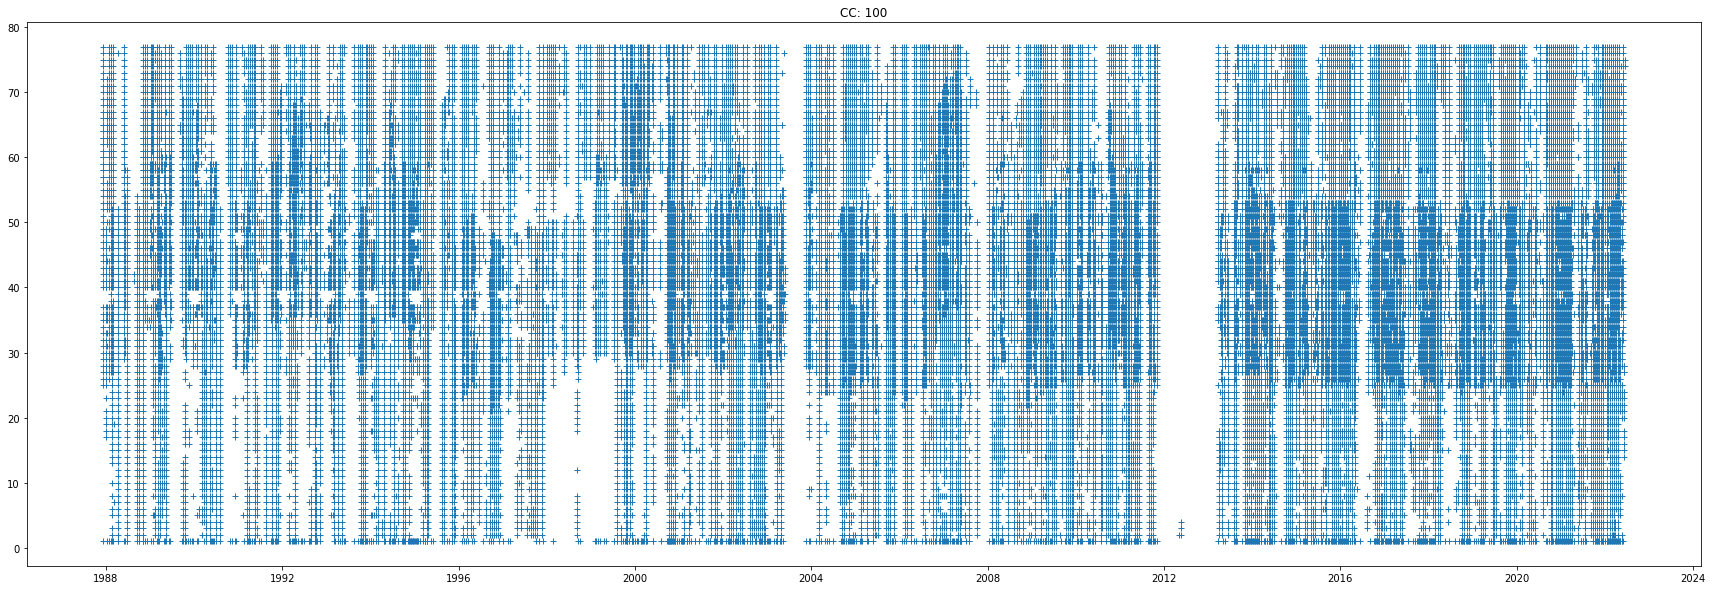

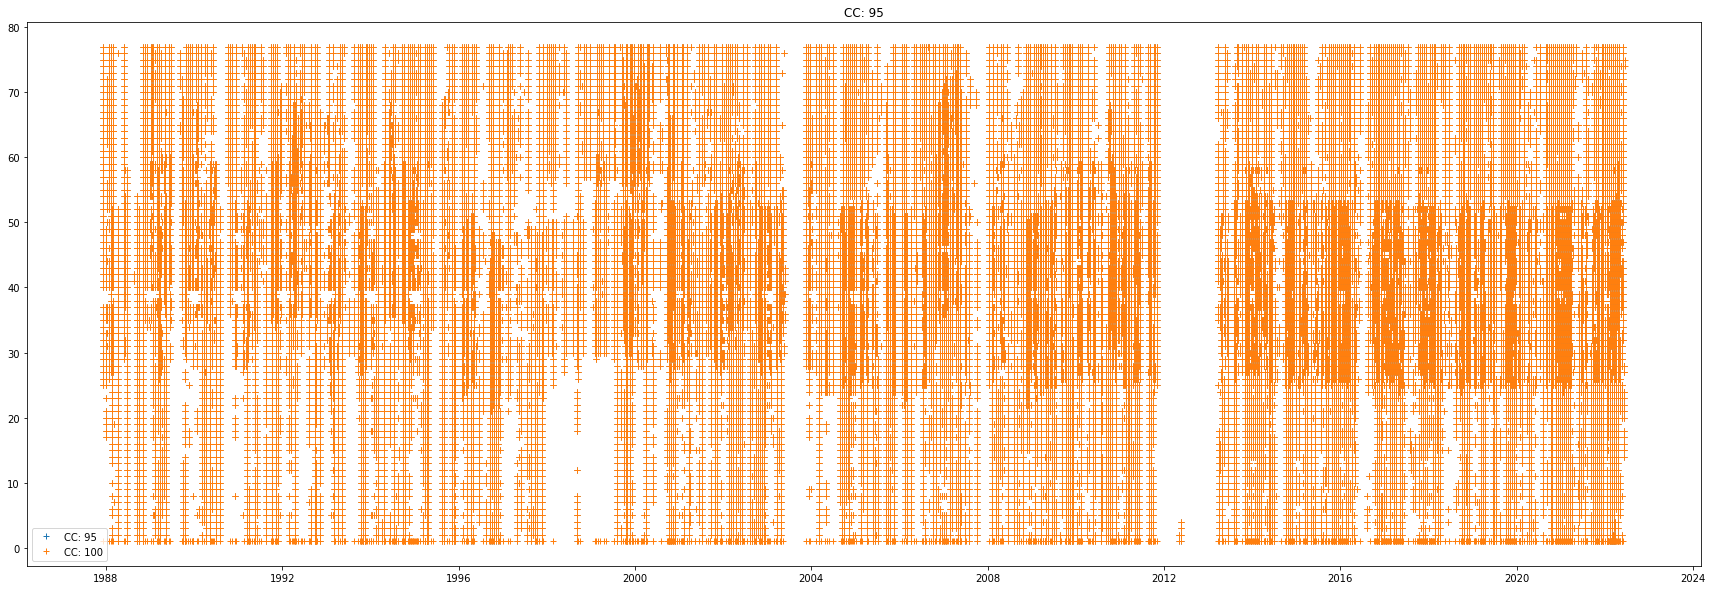

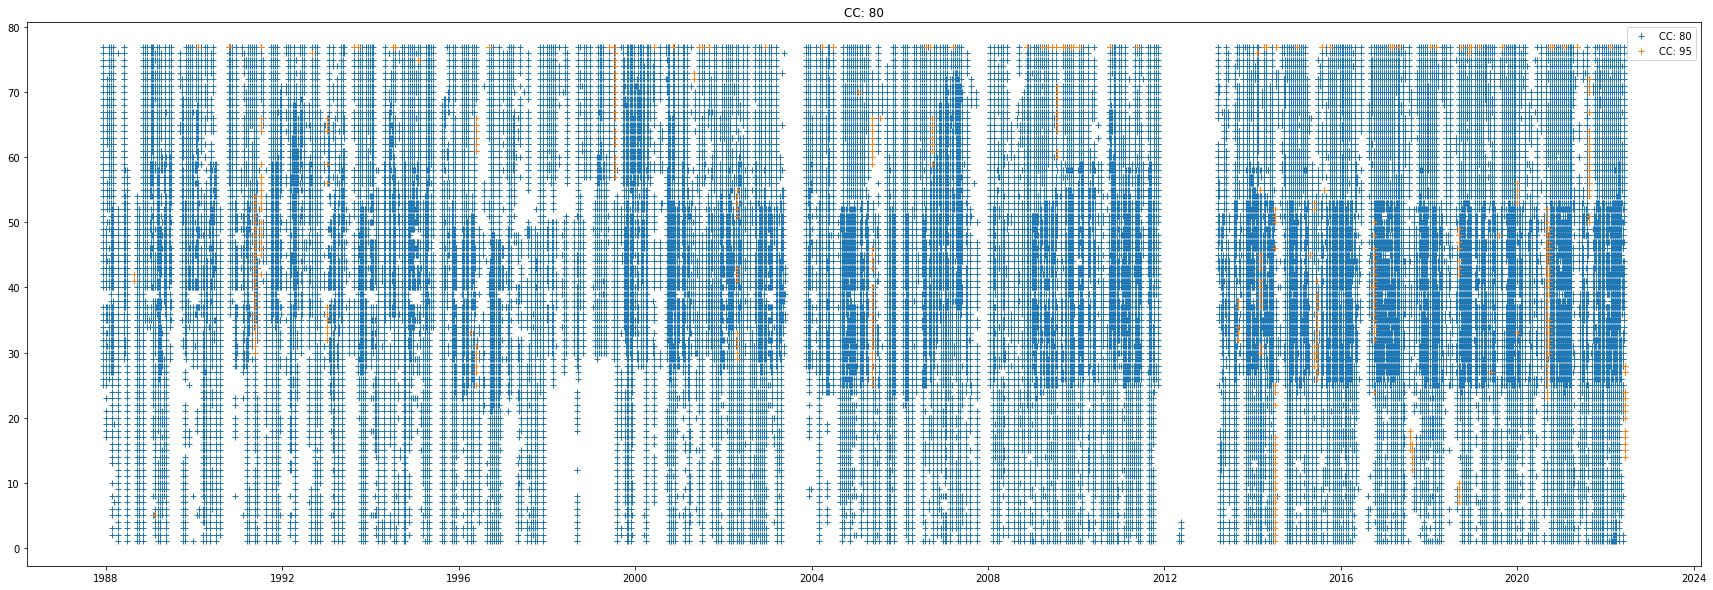

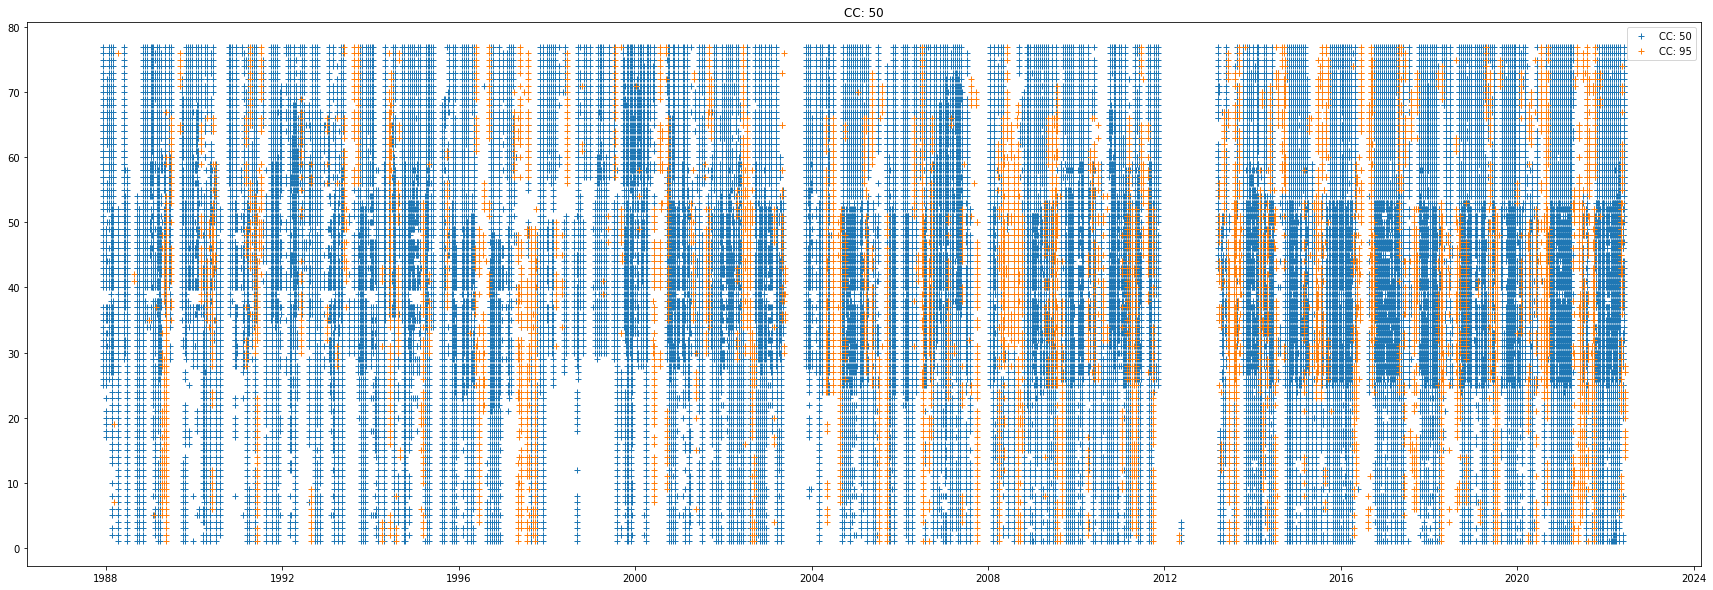

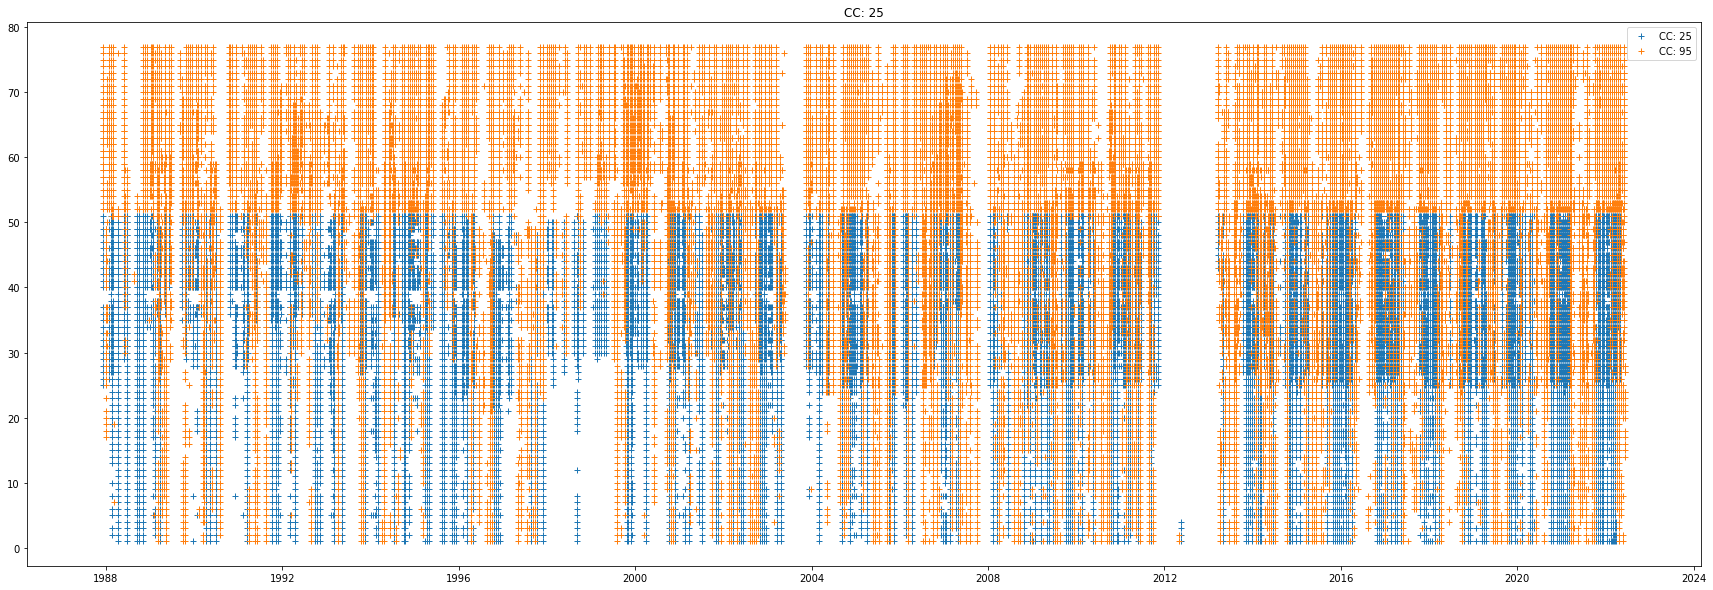

In [34]:
# Sparsity plot

# Barbara's opinion on CLOUD_FILTER
# - 
# - 

# GET DF100
# Work with reduced subset of DGOs.
# LOOK AT DATAPOINT OVERLAP
def plot_cc(name):
    df = pd.read_csv(f"Lhasa/Lhasa_Data-CC-{name}.csv", index_col=0);
    df["SENSING_TIME"] = df["SENSING_TIME"].map(pd.Timestamp);
    df['BRAIDING_INDEX'] = (df['TOTAL_PERIM_SMOOTH']/2)/2000;
    data = df; #df[["ID", "SENSING_TIME"]];
    plt.figure(figsize=(30,10));
    plt.title(f"CC: {name}");
    plt.plot(data["SENSING_TIME"], data["ID"], '+', label=f"CC: {name}");
    return data


df100 = plot_cc(100);

df95 = plot_cc(95);
df_diff = pd.concat([df100, df95]).drop_duplicates(keep=False);
print(df95.shape, df_diff.shape)
plt.plot(df_diff["SENSING_TIME"], df_diff["ID"], '+', label="CC: 100");
plt.legend();

df80 = plot_cc(80);
df_diff = pd.concat([df95, df80]).drop_duplicates(keep=False);
plt.plot(df_diff["SENSING_TIME"], df_diff["ID"], '+', label="CC: 95");
plt.legend();

df50 = plot_cc(50);
df_diff = pd.concat([df95, df50]).drop_duplicates(keep=False);
plt.plot(df_diff["SENSING_TIME"], df_diff["ID"], '+', label="CC: 95");
plt.legend();

df25 = plot_cc(25);
df_diff = pd.concat([df95, df25]).drop_duplicates(keep=False);
plt.plot(df_diff["SENSING_TIME"], df_diff["ID"], '+', label="CC: 95");
plt.legend();

print(df80.shape, df50.shape, df25.shape);

# df_c = df[df["ID"] == 1].sort_values("SENSING_TIME");

(73474, 9) (44773, 9) (21819, 9)


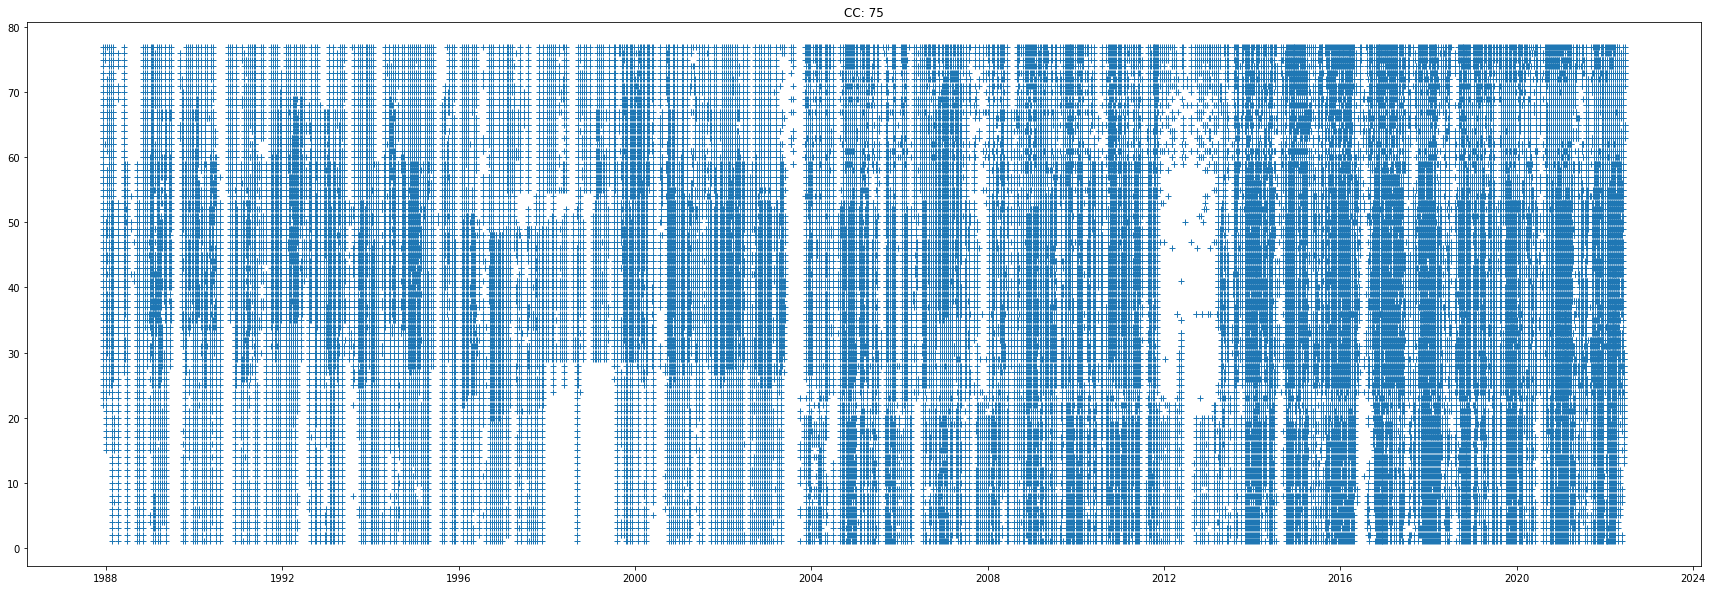

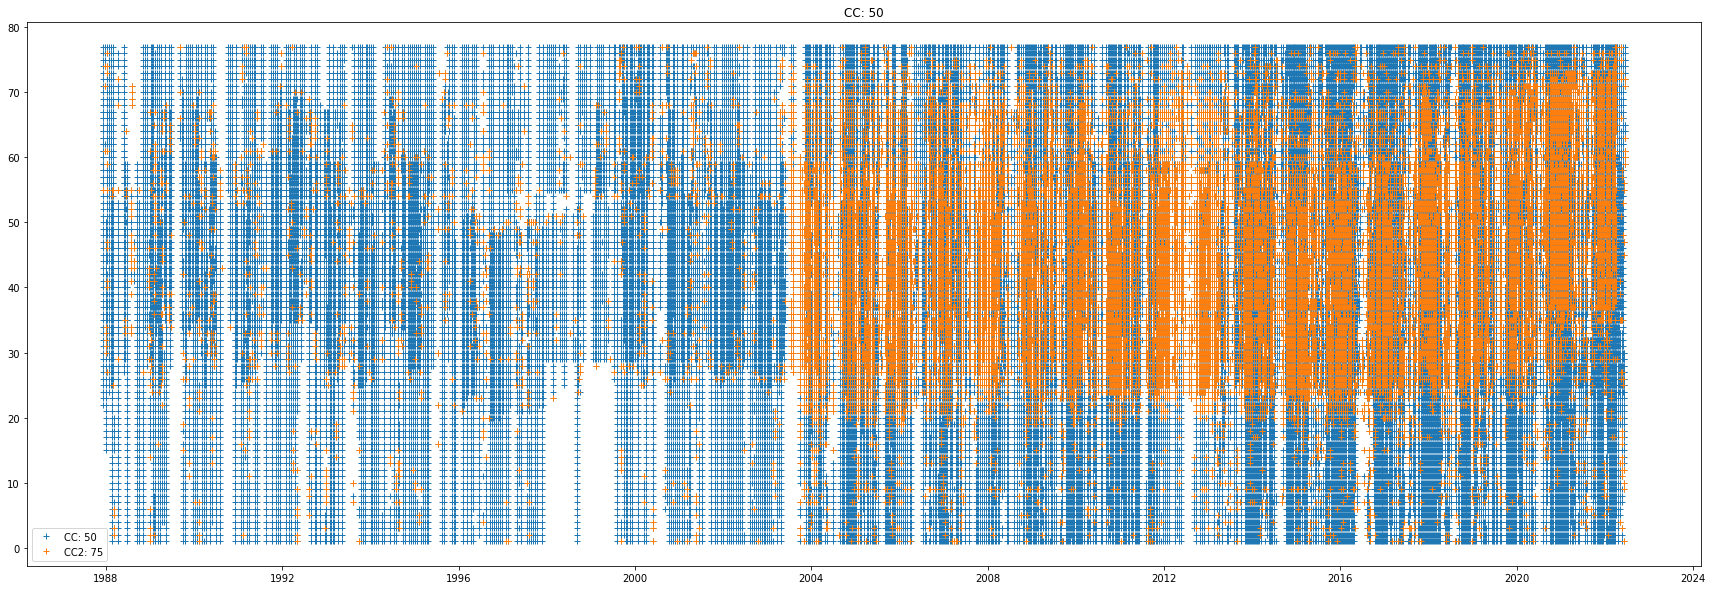

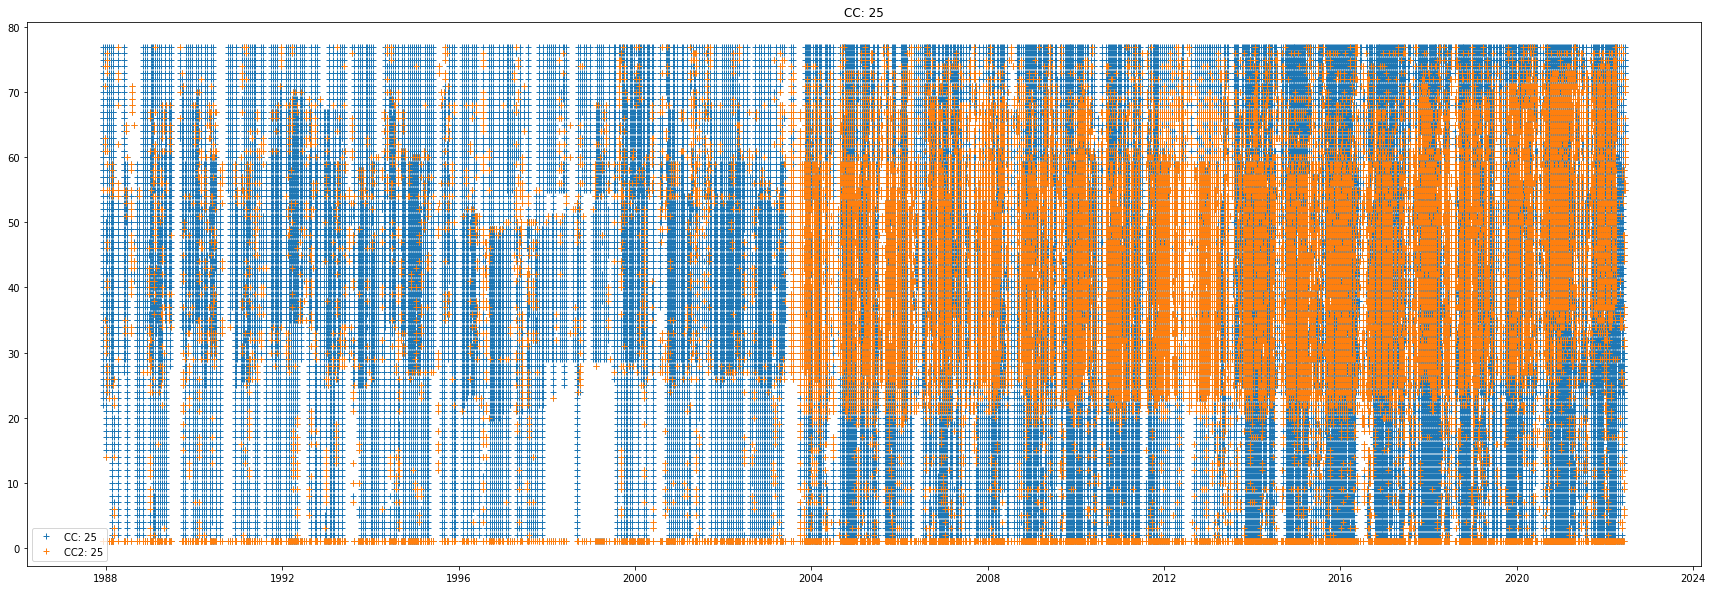

In [33]:
# Sparsity plot

# Barbara's opinion on CLOUD_FILTER
# - 
# - 

# GET DF100
# Work with reduced subset of DGOs.
# LOOK AT DATAPOINT OVERLAP

def plot_cc(name):
    df = pd.read_csv(f"Lhasa/Lhasa_Data-CC2-{name}.csv", index_col=0);
    df["SENSING_TIME"] = df["SENSING_TIME"].map(pd.Timestamp);
    df['BRAIDING_INDEX'] = (df['TOTAL_PERIM_SMOOTH']/2)/2000;
    data = df; #df[["ID", "SENSING_TIME"]];
    plt.figure(figsize=(30, 10));
    plt.title(f"CC: {name}");
    plt.plot(data["SENSING_TIME"], data["ID"], '+', label=f"CC: {name}");
    return data


dfs75 = plot_cc(75);

dfs50 = plot_cc(50);
df_diff = pd.concat([dfs75, dfs50]).drop_duplicates(keep=False);
plt.plot(df_diff["SENSING_TIME"], df_diff["ID"], '+', label="CC2: 75");
plt.legend();

dfs25 = plot_cc(25);
df_diff = pd.concat([dfs75, dfs25]).drop_duplicates(keep=False);
plt.plot(df_diff["SENSING_TIME"], df_diff["ID"], '+', label="CC2: 25");
plt.legend();

print(df75.shape, df50.shape, df25.shape);
# df_c = df[df["ID"] == 1].sort_values("SENSING_TIME");

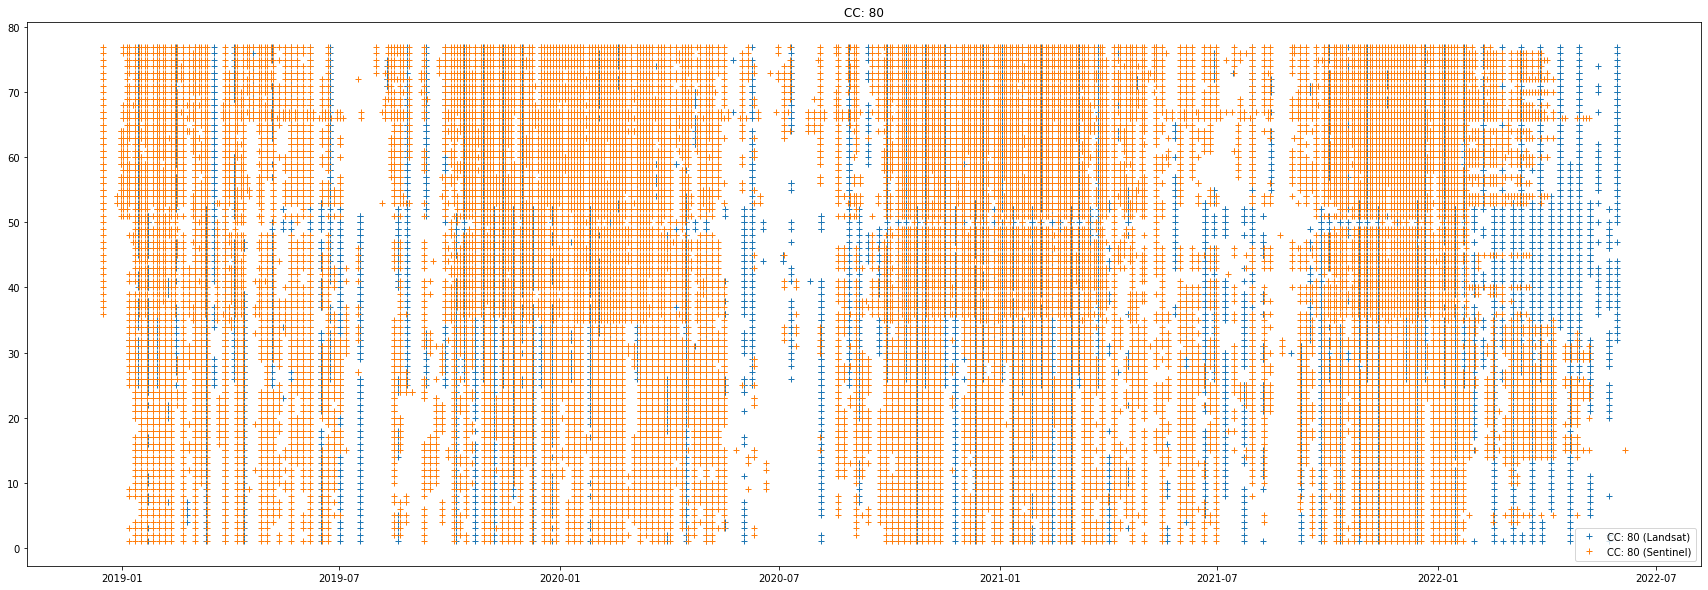

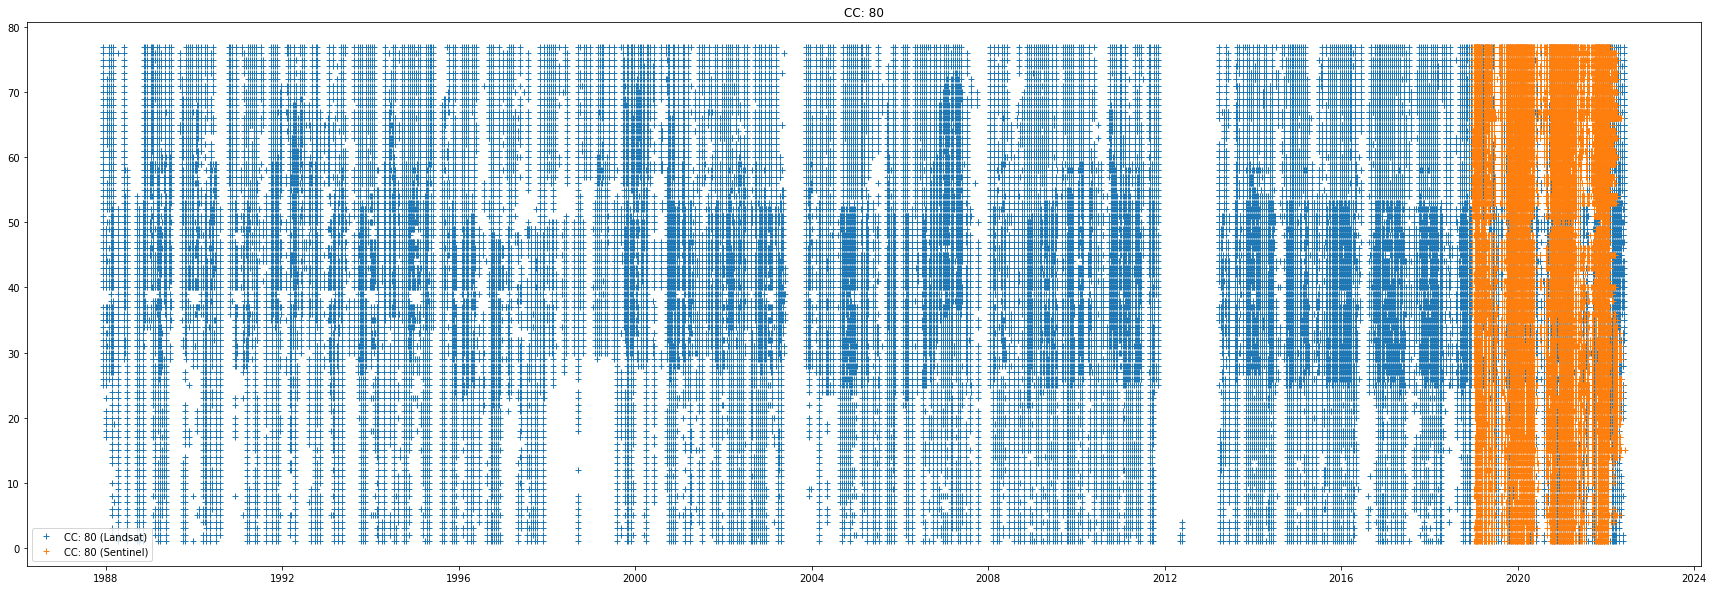

In [16]:
dfs = pd.read_csv("Lhasa/Lhasa_Sentinel_Data-CC-80.csv", index_col=0);
dfs["SENSING_TIME"] = dfs["SENSING_TIME"].map(partial(pd.to_datetime, unit='ms'));
dfs['BRAIDING_INDEX'] = (dfs['TOTAL_PERIM_SMOOTH']/2)/2000;

sentinel_min_time = dfs["SENSING_TIME"].min();
sentinel_max_time = dfs["SENSING_TIME"].max();
df = pd.read_csv(f"Lhasa/Lhasa_Data-CC-80.csv", index_col=0);
df["SENSING_TIME"] = df["SENSING_TIME"].map(pd.Timestamp);
df['BRAIDING_INDEX'] = (df['TOTAL_PERIM_SMOOTH']/2)/2000;
df_crop = df[(df["SENSING_TIME"] >= sentinel_min_time) & (df["SENSING_TIME"] <= sentinel_max_time)];

plt.figure(figsize=(30, 10));
plt.title(f"CC: 80");
plt.plot(df_crop["SENSING_TIME"], df_crop["ID"], '+', label=f"CC: 80 (Landsat)");
plt.plot(dfs["SENSING_TIME"], dfs["ID"], '+', label=f"CC: 80 (Sentinel)");
plt.legend();

plt.figure(figsize=(30, 10));
plt.title(f"CC: 80");
plt.plot(df["SENSING_TIME"], df["ID"], '+', label=f"CC: 80 (Landsat)");
plt.plot(dfs["SENSING_TIME"], dfs["ID"], '+', label=f"CC: 80 (Sentinel)");
plt.legend();

In [9]:
# CUMULATIVE GCD --- try to figure out & find the smallest spacing interval

a = (dfs[dfs['ID'] == 5]['SENSING_TIME']
 .sort_values().diff()[1:]
 .map(lambda t: t.days)
 .reset_index(drop=True))

print(a)
# GCD at each stage
last_gcd = a[0]
gcd_pairs = [(0, a[0])];
for k, v in enumerate(a[1:]):
    cur_gcd = np.gcd(last_gcd, v);
    if(cur_gcd != last_gcd):
        gcd_pairs.append((k+1, cur_gcd))
    last_gcd = cur_gcd
print(gcd_pairs)

0       4
1       5
2       4
3       5
4       4
       ..
135     4
136     5
137     9
138     9
139    20
Name: SENSING_TIME, Length: 140, dtype: int64
[(0, 4), (1, 1)]


(77, 310)
(77, 310)
(51, 302)


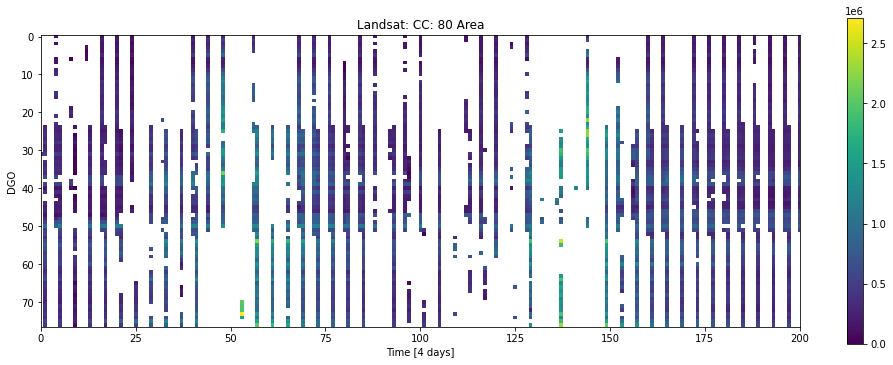

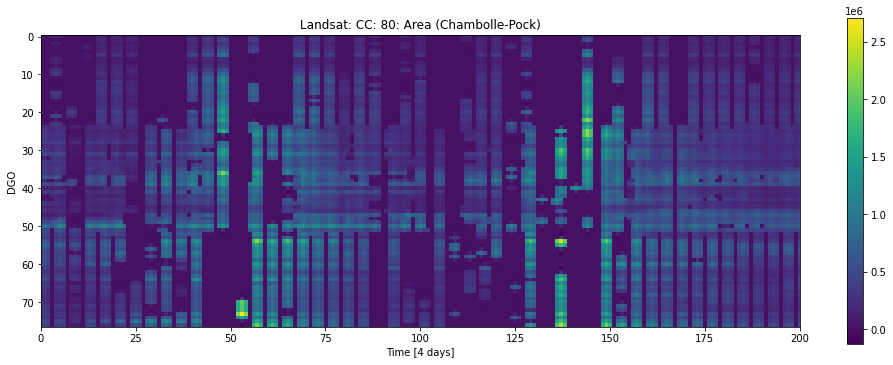

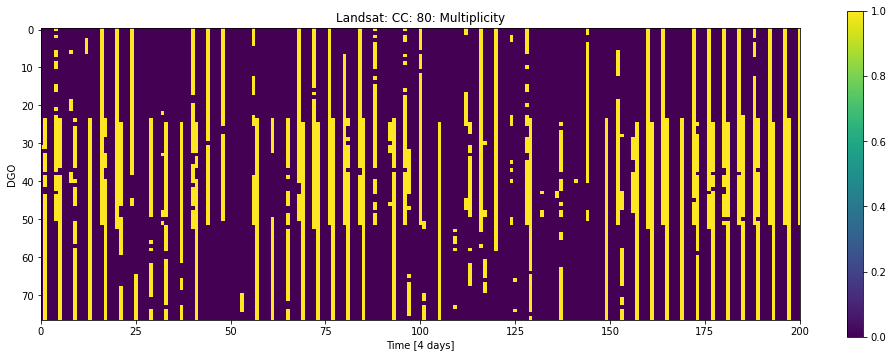

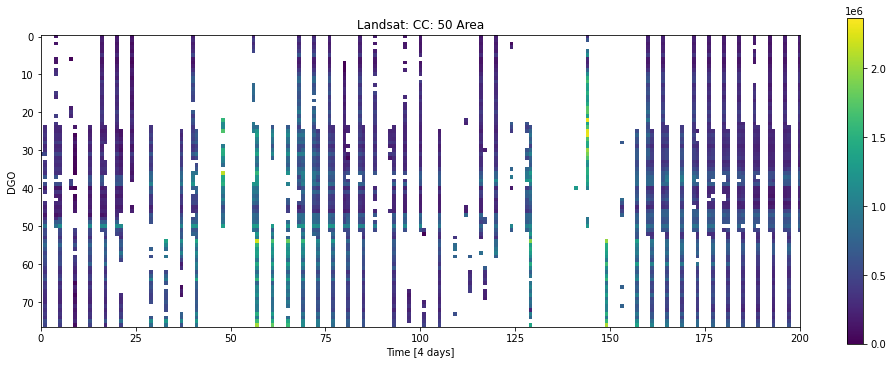

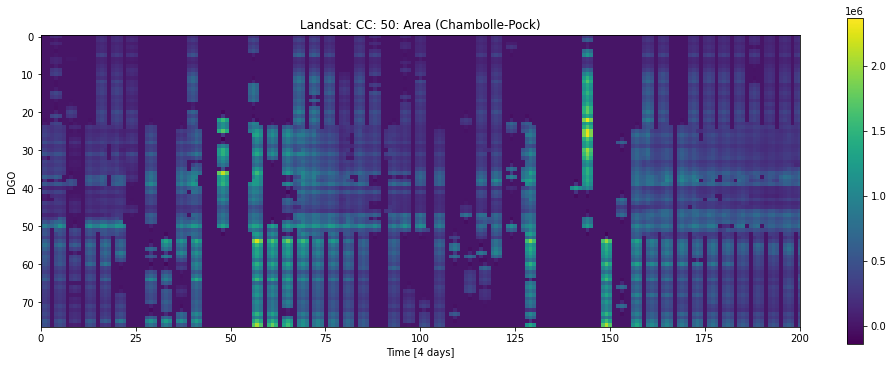

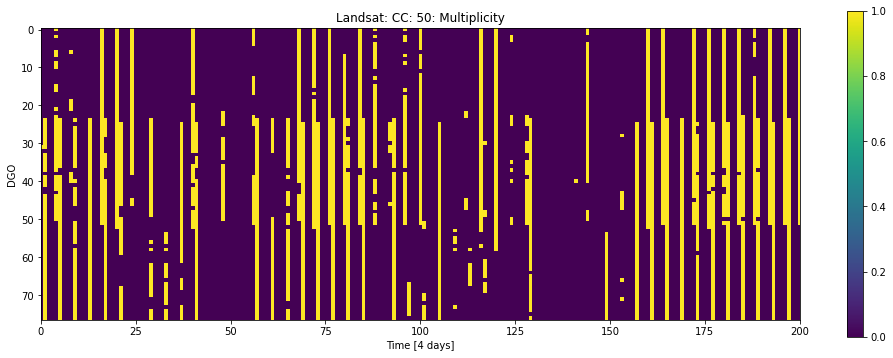

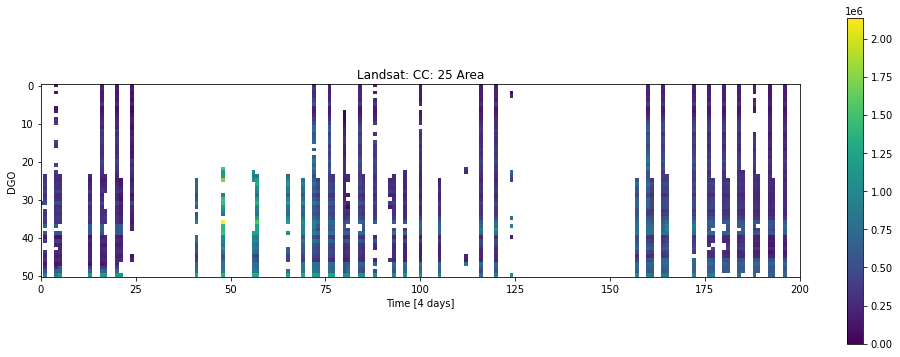

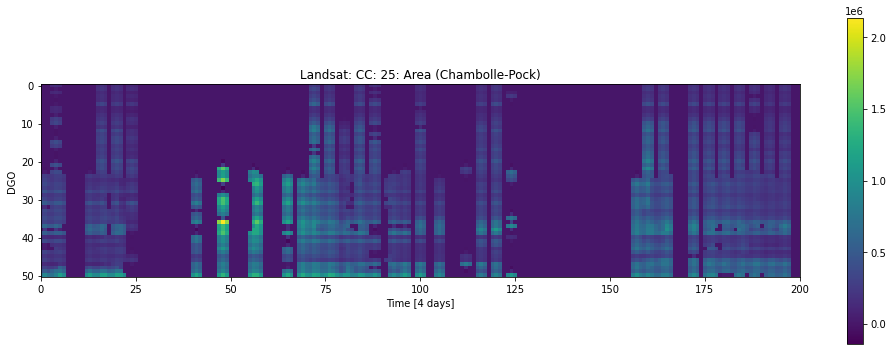

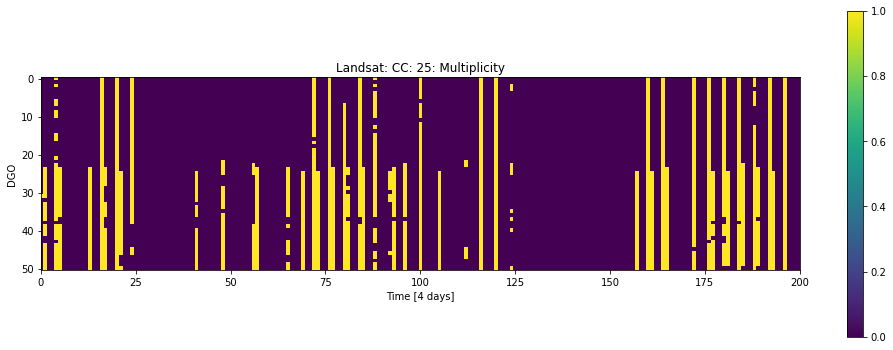

In [49]:
import scipy
import scipy.io
def plot_dataframe(df, title, d = 8):
    # df = df.groupby(["x", "t"]).mean().reset_index()
    df = df.groupby(["ID", "SENSING_TIME"]).max().reset_index();
    
    df["t"] = (df["SENSING_TIME"] - df["SENSING_TIME"].min()).map(lambda t: t.days // d).astype(int);
    df["x"] = df["ID"] - df["ID"].min();

    Z = np.full((df["x"].max()+1, df["t"].max()+1), np.nan);
    M = np.full((df["x"].max()+1, df["t"].max()+1), 0);
    print(Z.shape)
    for k, v in df[["x", "t", "AREA"]].iterrows():
        x = v["x"].astype(int);
        t = v["t"].astype(int);
        if(M[x, t] == 0):
            Z[x, t] = v["AREA"];
        else:
            Z[x, t] = (Z[x, t]*M[x, t] + v["AREA"])/(M[x, t] + 1);
    #           Z[x, t] = max(Z[x, t], v["BRAIDING_INDEX"]) # TAKE MAX INSTEAD OF MEAN
        M[x, t] += 1;

    # TODO: PRESERVE MULTIPLICITY INFORMATION! ALSO TILE INDEX
    # ALWAYS BE ABLE TO WORK BACKWARDS TO TILE ID FROM IMAGE

    plt.figure(figsize=(17, 6));
    plt.imshow(Z, interpolation='none');
    plt.xlim([0, 200]);
    plt.colorbar();
    plt.xlabel(f'Time [{d} days]');
    plt.ylabel('DGO');
    plt.title(f'{title} Area');

    xt_data = Z.copy()
    mask = np.ones(xt_data.shape);
    mask[np.isnan(xt_data)] = 0;
    xt_data[np.isnan(xt_data)] = 0;

    sigma = 0.05
    tau = 0.99/(1 + 4*sigma);
    xt_cp, *_ = ChambollePockDenoisingTVinpainting(xt_data, mask,
        lamb=np.array([0.001, 0.05]),
        tau=tau,sigma=sigma,Niter=5000)
    plt.figure(figsize=(17, 6));
    plt.imshow(xt_cp);
    plt.xlim([0, 200]);
    plt.colorbar();
    plt.xlabel(f'Time [{d} days]');
    plt.ylabel('DGO');
    plt.title(f'{title}: Area (Chambolle-Pock)');
    
    plt.figure(figsize=(17, 6));
    plt.imshow(M);
    plt.xlim([0, 200]);
    plt.colorbar();
    plt.xlabel(f'Time [{d} days]');
    plt.ylabel('DGO');
    plt.title(f'{title}: Multiplicity');
    scipy.io.savemat('save_location/'+title+'.mat', dict(xt=Z, xt_cp=xt_cp, xt_m=M));
    
    
    
df = df80.copy();
df = df[(df["SENSING_TIME"] >= sentinel_min_time) & (df["SENSING_TIME"] <= sentinel_max_time)];
df = df.groupby(["ID", "SENSING_TIME"]).max().reset_index()
plot_dataframe(df, "Landsat: CC: 80", d=4);

df = df50.copy();
df = df[(df["SENSING_TIME"] >= sentinel_min_time) & (df["SENSING_TIME"] <= sentinel_max_time)];
df = df.groupby(["ID", "SENSING_TIME"]).max().reset_index()
plot_dataframe(df, "Landsat: CC: 50", d=4);

df = df25.copy();
df = df[(df["SENSING_TIME"] >= sentinel_min_time) & (df["SENSING_TIME"] <= sentinel_max_time)];
df = df.groupby(["ID", "SENSING_TIME"]).max().reset_index()
plot_dataframe(df, "Landsat: CC: 25", d=4);

(77, 317)


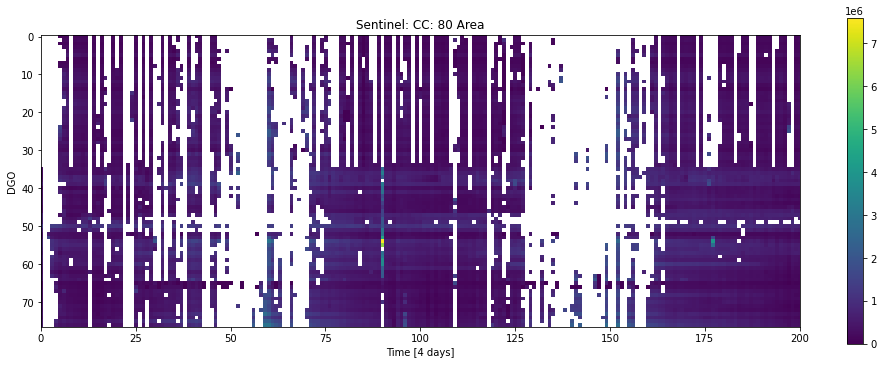

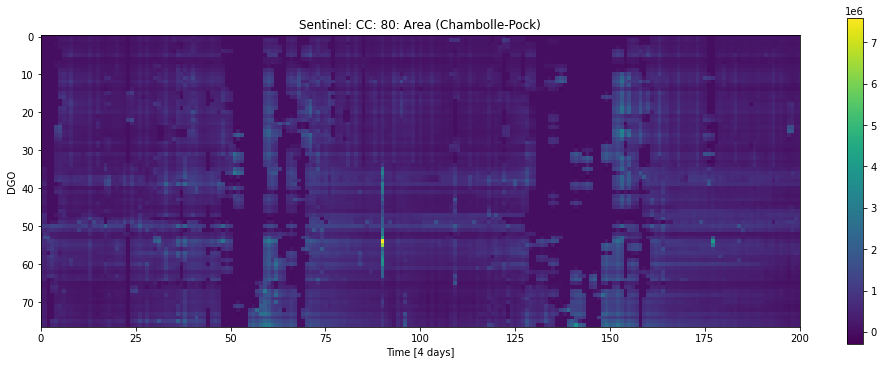

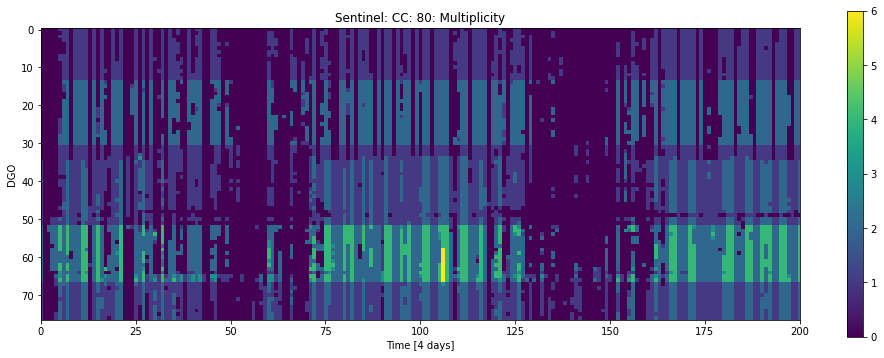

In [50]:
df = pd.read_csv("Lhasa/Lhasa_Sentinel_Data-CC-80.csv", index_col=0);
df["SENSING_TIME"] = df_s["SENSING_TIME"].map(partial(pd.to_datetime, unit='ms'));
df['BRAIDING_INDEX'] = (df['TOTAL_PERIM_SMOOTH']/2)/2000;
plot_dataframe(df, "Sentinel: CC: 80", d=4);
# TODO: Rectify axis labels
# Nelly: Talk about giving Barbara a list of dates/dgos we want to validate
# Before end of this week!

# We can check if it's possible to get data in BIG missing region.
# Data with more cloud but for much higher resolution images. (Better dataset)
# MAKE SURE TO DOCUMENT INSTALLATION PROCEDURE OF GEEMAP!!
#trytomakework for another person


# df = pd.read_csv("Lhasa/Lhasa_Sentinel_Data-CC-80.csv", index_col=0);
# df["SENSING_TIME"] = df_s["SENSING_TIME"].map(partial(pd.to_datetime, unit='ms'));
# df['BRAIDING_INDEX'] = (df['TOTAL_PERIM_SMOOTH']/2)/2000;
# plot_dataframe(df, d=4);